---
# 목차
---
* [1. 데이터 선형 비선형 확인하기](#데이터-선형-비선형-확인하기)
* [2. logistic, svm, lgbm](#logistic,-svm,-lgbm)
* [3. train_test분할](#train-test-분할)
* [4. SVC / SVR](#SVC-/-SVR)
* [5. logistic](#logistic)
* [6. lgbm](#lgbm)
* [7. rfecv](#rfecv)
* [8. model-comparison(미완)](#model-comparison)



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier#rf
from sklearn.ensemble import GradientBoostingClassifier #gbc
from xgboost import XGBClassifier #xgb
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
from lightgbm import plot_importance
import lightgbm as lgb
#from lightgbm import LGBMClassifier#lgbm
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import FinanceDataReader as fdr
from datetime import date
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils import resample
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
#catboost
#svm
#naive basian
#logistic
#딥러닝도 한번 써볼까

In [2]:
plt.style.use('ggplot') #ggplot스타일 사용
#한글폰트
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)

In [39]:
train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('application_test.csv')
br_df = pd.read_csv('bureau.csv') #고객들의 신용정보가 여러개로 담겨있음
fin_df2 = pd.read_pickle('캐글스터디df2.pkl')
kaggle = pd.read_pickle('최인식.pkl')

In [23]:
'''rfecv를 테스팅해보기 위해서 사용했던 코드'''
train_df = train_df.dropna(axis=0)

---
모델링을 위해서는 부스팅기반의 모델을 사용하지 않는 이상 결측치가 존재하면 데이터를 학습시킬 수 없다. 따라서 모델링을 할 때 결측치 처리는 필수  

---
# 데이터 선형 비선형 확인하기
---

In [ ]:
'''비선형
svc의 kernal로 rbf사용'''

---
# logistic, svm, lgbm
---

In [ ]:
'''baseline모델로 사용할 것은 위의 모델들을 baseline모델로 활용할 것임'''

In [24]:
'''categorical데이터'''
a = train_df.select_dtypes('object')
cate = pd.DataFrame()
for i in range(len(a.columns)):
    a0 = a.iloc[:,i].unique().tolist()
    
    cate0 = pd.DataFrame({'var_nm':[a.columns[i]],
                        'cate_data':[a0],
                        'cate_num':[len(a.iloc[:,i].unique())]})
    
    cate = cate.append(cate0)
    cate.index = range(len(cate))

In [25]:
'''라벨링 및 ONE-HOT ENCODING'''
'''라벨링 - 컬럼내의 변수갯수가 2개이하일 떄
1. 애초에 라벨링할 변수는 결측치가 없음 그런데 물어봐야할 것은 gender와 ORGANIZATION_TYPE xna값 처리를 했는지?
2. dummy변수를 생성했는지?
-라벨링과 dummy변수를 만들면 na값이 사라짐'''
for i in range(len(cate)):
    if cate['cate_num'].iloc[i] <=2:
        le = LabelEncoder()
        y = list(train_df[cate['var_nm'].iloc[i]])

        le.fit(y)
        y2 = le.transform(y) 

        train_df[cate['var_nm'].iloc[i]] = y2

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
'''나머지 categorical 컬럼에 대한 one-hot인코딩'''
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()

#x = np.array(train_df[cate['var_nm'].iloc[4]])
#ohe.fit(x)

train_df = pd.get_dummies(train_df)

In [27]:
train_df.dtypes.value_counts()

uint8      120
float64     65
int64       46
dtype: int64

---
# train-test 분할
---

In [15]:
fin_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ext_interval_낮음,ext_interval_높음,ext_interval_보통,age_interval_20대,age_interval_30대,age_interval_40대,age_interval_50대,age_interval_60대
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,1,0,0,1,0,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,1,0,0,1,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,1,0,0,0,1,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,1,0,0,0,0,0,1,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,2:], np.array(train_df['TARGET'].tolist()), test_size=0.3, stratify=np.array(train_df['TARGET'].tolist()), random_state=123456)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(fin_df2.iloc[:,2:], np.array(fin_df2['TARGET'].tolist()), test_size=0.3, stratify=np.array(fin_df2['TARGET'].tolist()), random_state=123456)

---
# SVC / SVR
---
 - 너무오래걸리므로 오늘은 일단 logistic이랑 lgbm만 사용
 - 데이터의 갯수가 많을수록 학습하는데 시간이 굉장히 오래걸림

In [20]:
from sklearn.svm import SVC

In [35]:
model = SVC(kernel='rbf', probability=True)

In [36]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
model.fit(data_train_model,y_train)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
prob = model.predict_proba()

---
# logistic
---
- logistic회귀는 분류문제에서 baseline으로 주로 사용되며 설명변수에 의해서 결정변수가 나타날 확률을 구한다
- 특징으로는 설명변수에 결측치가 존재하면 모델이 돌아가지 않음

In [52]:
kaggle = kaggle.iloc[:,1:]

In [59]:
train_df = train_df.iloc[:,1:]

In [60]:
train_df = pd.get_dummies(train_df)

In [44]:
data_mis_val = mis_val_treatment(fin_df2,'mean',10)

In [45]:
data_model = data_model_constuct(fin_df2,data_mis_val)

In [43]:
def mis_val_treatment(data,string,percentage):
    """Treat the missing values.

    * This function select the features which have a number of missing values less than a given threshold
    * Numeric features : Replace missing values selected with mean/median of the feature
    * categorical features : Replace missing values with a new class named "missing value"

    :param data: data to treat
    :param string: mean/median
    :param percentage: percentage to define a threshold for missing values
    :return: data treated
    
    """
    var = data.isnull().sum()
    threshold = round(len(data.index) / percentage)#결측치가 30000만개 이하인 data를 선택
    data_mis_val = data[var[var!=0][var<threshold].index].copy()
    names_data = list(data_mis_val.columns.values)
    names_data_numeric = list(data_mis_val.describe().columns.values)
    
    for name in names_data:
        s = data_mis_val[name]
        if name in names_data_numeric:
            if string == "mean":
                s = s.fillna(s.mean())
            if string == "median":
                s = s.fillna(s.median())
        else:
            s = s.fillna("missing_value")
        data_mis_val[name] = s
        
    return data_mis_val

def data_model_constuct(data,data2):
    '''
    Reconstruct data after missing values treatment and one hot encoding

    :param data: data to reconstruct
    :param data2: result of mis val_treatment
    :return: data model constructed
    '''
    var = data.isnull().sum()
    data1 = data[var[var==0].index].copy()
    data_model = pd.concat([data1,data2],axis=1)
    #1. pd.get_dummies부분은 gender와 organization의 xna결측치를 처리해야함 , 사실상 포함해도되긴
    #하나 나중에 다시 고려해봐야지
    #2. 그리고 이미 getdummy를 한 상태라면 해당 코드의 줄은 없애도 됨
    #data_model = pd.get_dummies(data_model)
    return data_model

def train_val_size(data,val_size,test_size):
    '''
    Split data into train validation and test datasets
    
    :param data:  data to split
    :param val_size: percentage of validation dataset size [0,1]
    :param test_size: percentage of test dataset size [0,1] 
    :return: dictionary containing the 3 datasets
    
    '''
    y=data['TARGET']
    data_train, data_valtest, y_train, y_valtest = train_test_split(data, y, test_size=val_size+test_size)
    data_val, data_test, y_val, y_test = train_test_split(data_valtest, y_valtest, test_size=val_size/(val_size+test_size))
    return {'data_train':data_train,'data_val':data_val,'data_test':data_test}

def prepare_data(path_to,string="mean",percentage=10,val_size=0.2,test_size=0.2):
    data = path_to
    data_mis_val = mis_val_treatment(data,string,percentage)
    data_model = data_model_constuct(data, data_mis_val)
    dict = train_val_size(data_model,val_size,test_size)
    return dict

In [9]:
dict_data = prepare_data(fin_df2)

In [54]:
dict_data = prepare_data(kaggle)

In [61]:
dict_data = prepare_data(train_df)

In [62]:
data_val = dict_data['data_val']
y_val = data_val['TARGET']
data_val_model = data_val.drop(['TARGET'], axis=1)

data_train = dict_data['data_train']
data_val = dict_data['data_val']
data_test = dict_data['data_test']

# Get target variable from each data
y_train = data_train['TARGET']
y_val = data_val['TARGET']
y_test = data_test['TARGET']

data_train_model = data_train.drop(['TARGET'], axis=1)
data_val_model = data_val.drop(['TARGET'], axis=1)
data_test_model = data_test.drop(['TARGET'], axis=1)

model = LogisticRegression()
model1 = model.fit(data_train_model,y_train)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
def reglog_model_results(model,data_test,y_test):
    '''
    Performance model results
    
    :param model: model to implement
    :param data_test: data to test
    :param y_test: target variable 
    :return: dictionary of performance results
    '''

    # Calculate Class Probabilities
    probability = model.predict_proba(data_test)

    # Predicted Class Labels
    y_predicted = model.predict(data_test)

    # Evaluate The Model

    ### Confusion Matrix
    Confusion_Matrix = metrics.confusion_matrix(y_test, y_predicted)

    ### Classification Report
    Classification_Report = metrics.classification_report(y_test, y_predicted)

    ### Model Accuracy
    Accuracy = model.score(data_test, y_test)

    ### AUC
    y_pred_proba = probability[:, 1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.auc(fpr, tpr)

    return {'Class_Probabilities':probability,'Predicted_Class_Labels':y_predicted,'Confusion_Matrix':Confusion_Matrix,'Classification_Report':Classification_Report,'Accuracy':Accuracy, 'AUC':auc}

In [63]:
results_model = reglog_model_results(model1, data_val_model, y_val)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


진짜 기본 - 0.61
민용 - 0.55
인식님 - 0.62

In [64]:
results_model['AUC']

0.6118577882983903

In [19]:
results_model['Accuracy']

0.9189782446099314

In [18]:
results_model['Confusion_Matrix'] #무조건 0으로 예측하는디?

array([[56519,     0],
       [ 4983,     0]], dtype=int64)

---
# lgbm
---

In [18]:
def lgbm(df):
    model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                       class_weight = 'balanced', learning_rate = 0.05, 
                                       reg_alpha = 0.1, reg_lambda = 0.1, 
                                       subsample = 0.8, n_jobs = -1, random_state = 50)

    train_df_x = df.iloc[:,2:] #id와 target값 제거
    labels = df['TARGET'] #target값 저장
    k_fold = KFold(n_splits = 5, shuffle = False, random_state = 50) #5fold 교차검증 진행
    features = np.array(train_df_x) #설명변수 array화
    feature_names = list(train_df_x.columns) #변수명 저장
    feature_importance_values = np.zeros(len(feature_names)) #후에 변수중요도 확인 위해서 작업
    out_of_fold = np.zeros(features.shape[0]) #데이터 검증
    
    if 'object' not in train_df_x.dtypes.tolist():
        cat_indices = [] #object변수가 없기 때문에 빈 리스트로 둔다
    else:
        cat_indices = []
        for i in range(len(train_df_x.columns)):
            if train_df_x.iloc[:,i].dtype=='object':
                cat_indices.append(i)
    
    
    #데이터를 학습시키고 검증하는 방법으로 train_test_split 를 하는 방법도 있지만 5cv로 데이터를
    #분할하고 검증하는 방법이 있다.
    valid_scores = [] #검증용 셋 생성
    train_scores = []  #훈련데이터셋 생성
    for train_indices, valid_indices in k_fold.split(features):#k_fold 5 교차검증으로 데이터를 분할하여 각각 검증
        train_features, train_labels = features[train_indices], labels[train_indices]
        #train_index를 받는 것, 전체데이터를 5등분한 후 1개의 군집을 검증셋으로 두고 나머지 4개의 군집을 학습 데이터로 이용
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        #검증셋의 index를 받는 것, 전체 데이터를 5등분 한 후 돌아가면서 검증용 데이터로 사용
        
        #모델 생성
        #class_weight = balance로 두고 데이터를 학습시키면 불균형 데이터를 같은 가중치로 놓고 학습을 
        #진행한다.
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                       class_weight = 'balanced', learning_rate = 0.05, 
                                       reg_alpha = 0.1, reg_lambda = 0.1, 
                                       subsample = 0.8, n_jobs = -1, random_state = 50)
        
        #모델 학습
        #early_stopping을 줘야 데이터 학습시키는 시간이 줄어든다.
        #따라서 학습시 평가셋을 같이 주고 데이터를 학습시킨다.
        model.fit(train_features, train_labels,
              eval_metric = 'auc',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], 
              categorical_feature = cat_indices,
              early_stopping_rounds = 100, verbose = 200)
        
        
        #best_iteration ??
        best_iteration = model.best_iteration_
        
        #5개의 검증셋별로 중요하게 사용한 변수별 중요도 수치
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        #배열에서 첫번째 열과 두번째 열의 차이는 뭘까...
        #예측치는 원래 1/0이지만 predict_proba로 예측했으므로 확률값으로 도출한다.
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        #모델의 best_score는 eval_names로 확인할 수 있듯이 
        #평가셋을 valid/train으로 했으므로 두가지의 결과값을 볼 수 있다.
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # 메모리 초기화-------------------------------------------------------
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        # 메모리 초기화-------------------------------------------------------
    
    #변수중요도 시각화를 위한 데이터셋
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    #기존에 위에서는 cv1,cv2..cv5의 각 검증셋별 auc면적을 넣었던 것이고 밑의 코드는 
    #전체 데이터에 대해서 auc면적을 넣는다.
    valid_auc = roc_auc_score(labels, out_of_fold)

    # 전체 데이터에 데한 score를 metric에 추가
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # validation scores를 위한 데이터프레임 생성
    # Needed for creating dataframe of validation scores
    fold_names = list(range(5))
    fold_names.append('overall')

    # training 및 validation score가 저장된 데이터프레임 생성
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})
    
    return feature_importances, metrics




In [40]:
feature_importances, metrics = lgbm(fin_df2)

C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.79912	train's binary_logloss: 0.547174	valid's auc: 0.759444	valid's binary_logloss: 0.561762
Early stopping, best iteration is:
[253]	train's auc: 0.808202	train's binary_logloss: 0.538158	valid's auc: 0.759943	valid's binary_logloss: 0.556354


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.799167	train's binary_logloss: 0.547071	valid's auc: 0.76091	valid's binary_logloss: 0.566195
Early stopping, best iteration is:
[185]	train's auc: 0.796474	train's binary_logloss: 0.549693	valid's auc: 0.761096	valid's binary_logloss: 0.567712


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.800746	train's binary_logloss: 0.545244	valid's auc: 0.750957	valid's binary_logloss: 0.563785
Early stopping, best iteration is:
[195]	train's auc: 0.799791	train's binary_logloss: 0.546215	valid's auc: 0.75105	valid's binary_logloss: 0.56428


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.798653	train's binary_logloss: 0.547782	valid's auc: 0.760665	valid's binary_logloss: 0.561429
Early stopping, best iteration is:
[236]	train's auc: 0.805075	train's binary_logloss: 0.541491	valid's auc: 0.760941	valid's binary_logloss: 0.557537


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.799237	train's binary_logloss: 0.547017	valid's auc: 0.759686	valid's binary_logloss: 0.562137
[400]	train's auc: 0.830358	train's binary_logloss: 0.51632	valid's auc: 0.760485	valid's binary_logloss: 0.543098
Early stopping, best iteration is:
[328]	train's auc: 0.820174	train's binary_logloss: 0.526504	valid's auc: 0.760606	valid's binary_logloss: 0.549551


In [19]:
feature_importances, metrics = lgbm(kaggle)

C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.808488	train's binary_logloss: 0.538789	valid's auc: 0.766035	valid's binary_logloss: 0.554012
[400]	train's auc: 0.842555	train's binary_logloss: 0.503761	valid's auc: 0.765842	valid's binary_logloss: 0.532324
Early stopping, best iteration is:
[306]	train's auc: 0.82775	train's binary_logloss: 0.519092	valid's auc: 0.766509	valid's binary_logloss: 0.54172


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.808642	train's binary_logloss: 0.538714	valid's auc: 0.767929	valid's binary_logloss: 0.558272
Early stopping, best iteration is:
[226]	train's auc: 0.813889	train's binary_logloss: 0.533358	valid's auc: 0.768319	valid's binary_logloss: 0.554966


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.80963	train's binary_logloss: 0.537301	valid's auc: 0.759013	valid's binary_logloss: 0.5556
[400]	train's auc: 0.843861	train's binary_logloss: 0.50179	valid's auc: 0.75914	valid's binary_logloss: 0.53439
Early stopping, best iteration is:
[334]	train's auc: 0.833784	train's binary_logloss: 0.512442	valid's auc: 0.759489	valid's binary_logloss: 0.540754


C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\tlsal\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.808257	train's binary_logloss: 0.539314	valid's auc: 0.767157	valid's binary_logloss: 0.553556


KeyboardInterrupt: 

In [59]:
metrics #valid score의 평균을 낼 것임

,fold,train,valid
0,0,0.809199,0.760273
1,1,0.812654,0.761398
2,2,0.809734,0.750451
3,3,0.811121,0.760245
4,4,0.802236,0.760972
5,overall,0.808989,0.758635


In [11]:
metrics #valid score의 평균을 낼 것임

,fold,train,valid
0,0,0.810727,0.759654
1,1,0.799686,0.761147
2,2,0.803645,0.751563
3,3,0.803973,0.760902
4,4,0.837636,0.760886
5,overall,0.811133,0.758799


In [36]:
metrics

,fold,train,valid
0,0,0.808202,0.759943
1,1,0.796474,0.761096
2,2,0.799791,0.751050
3,3,0.805075,0.760941
4,4,0.820174,0.760606
5,overall,0.805943,0.758730


In [37]:
def plot_feature_importance(df):
    """
    
    모델로부터 feature imporantance를 플롯. 높은 중요도가 더 나은 값을 나타내는 다른 측정 방들과 같이 사용할 수 있습니다. 
    Plot importances returned by a model. This can work with any measure of feature importance provided
    that higher importance is better. 
    
    인수 (Args):
       
        df (dataframe): feature importance들이 저장된 데이터프레임. `features` column에는 feature들이 저장되어있고,
        `importance` column에는 imporance가 저장되어있음.
        
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance`      
    
    출력값 (Returns):
        
        상위 15개의 중요한 feature들을 플롯
        shows a plot of the 15 most importance features
    
        df (dataframe) : 내림차순으로 정렬한 정규화(normalized) feature importance들.
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance    
    
    """
    
    # 중요도(importance)에 따라 정렬
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # feature importance 정규화(normalize) 및 새로운 column에 추가
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # feature importance 바차트 생성
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # 중요도가 큰 feature들이 위로가도록  index를 반전(reverse)
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # y축 눈금 및 label 설정
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # x축 및 그래프 제목 설정 후 플롯
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

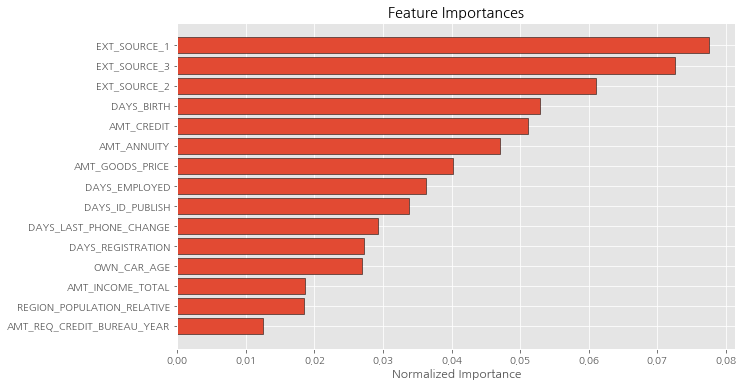

,index,feature,importance,importance_normalized
0,30,EXT_SOURCE_1,619.0,0.077511
1,32,EXT_SOURCE_3,580.0,0.072627
2,31,EXT_SOURCE_2,487.4,0.061032
3,9,DAYS_BIRTH,422.8,0.052943
4,5,AMT_CREDIT,408.6,0.051165
5,6,AMT_ANNUITY,375.6,0.047032
6,7,AMT_GOODS_PRICE,320.8,0.040170
7,10,DAYS_EMPLOYED,289.6,0.036263
8,12,DAYS_ID_PUBLISH,269.6,0.033759
9,80,DAYS_LAST_PHONE_CHANGE,233.4,0.029226


In [64]:
plot_feature_importance(feature_importances)

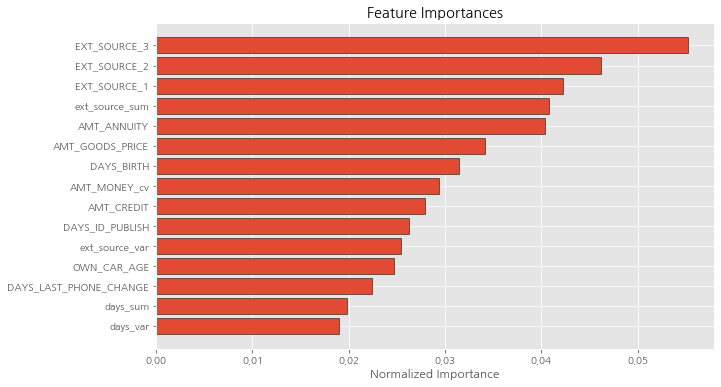

,index,feature,importance,importance_normalized
0,32,EXT_SOURCE_3,396.4,0.055194
1,31,EXT_SOURCE_2,331.8,0.046199
2,30,EXT_SOURCE_1,303.2,0.042217
3,113,ext_source_sum,293.0,0.040796
4,6,AMT_ANNUITY,289.8,0.040351
5,7,AMT_GOODS_PRICE,245.4,0.034169
6,9,DAYS_BIRTH,226.2,0.031495
7,110,AMT_MONEY_cv,211.0,0.029379
8,5,AMT_CREDIT,200.4,0.027903
9,12,DAYS_ID_PUBLISH,188.4,0.026232


In [41]:
plot_feature_importance(feature_importances)

---
# rfecv
---

In [52]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [59]:
model = lgb.LGBMClassifier(n_estimators=100, objective = 'binary', 
                                       class_weight = 'balanced', learning_rate = 0.05, 
                                       reg_alpha = 0.1, reg_lambda = 0.1, 
                                       subsample = 0.8, n_jobs = -1, random_state = 50)

In [ ]:
'''rfecv의 default parameter 목록/ rfecv는 na값을 가진 데이터에서는 학습모델이 돌아가지 않는다.

rfecv의 대표적인 method로는
1. selector.grid_scores_ : 변수별 누적 변수중요도를 확인하는 것 (pca를 생각해주면 된다.)
2. selector.ranking : 변수별 중요도 순위를 확인할 수 있는 method'''
selector.fit(X_train, y_train)

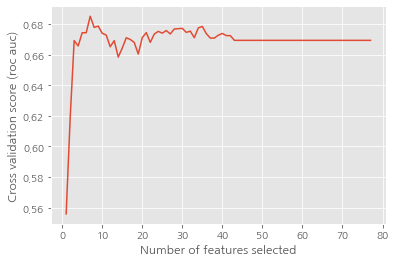

In [55]:
selector =RFECV(estimator=model, step=3, 
   cv=3, scoring='roc_auc')

selector.fit(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (roc auc)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)

rankings = pd.DataFrame({'feature': list(X_train.columns), 'rank': list(selector.ranking_)}).sort_values('rank')

In [58]:
rankings

,feature,rank
31,EXT_SOURCE_1,1
76,TOTALAREA_MODE,1
51,YEARS_BUILD_MODE,1
52,COMMONAREA_MODE,1
57,LANDAREA_MODE,1
14,OWN_CAR_AGE,1
13,DAYS_ID_PUBLISH,1
12,DAYS_REGISTRATION,1
10,DAYS_BIRTH,1
11,DAYS_EMPLOYED,1


---
# model comparison
---
각 모델별 교차검증하여 f1-score의 평균과 이를 좀 더 변동성 내에서 확인하기 위해 표준편차를 통해서 비교한다. 
f1-score는 평균으로 생각하면 되는데 위의 설명처럼 변동성을 잘 반영하기 위해서 가중평균방식을 사용한다.

앞으로 여러모델을 비교해서 어떤 모델의 성능이 가장 좋았는지 그리고 rfecv를 통해서 가장 좋은 모델의 변수는 어떤 걸 사용했고 어느정도까지만 사용해도 모델의 성능을 뒷받침하는데 필요한지 확인한다.  
  
  
모델을 사용하기 위해서는 결측치가 있으면 안된다. / boosting 기반 모델 제외
- 결측치가 있으면 돌아가지 않는 모델 :
- 결측치가 있어도 돌아가는 모델 :

In [57]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [61]:
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [62]:
'''테스트용'''
cv_score = cross_val_score(model, X_train, y_train, cv = 5, scoring = scorer)

In [64]:
cv_score.mean()

0.5627763600006694

In [67]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])
def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, 
                                cv = 5, scoring=scorer, n_jobs = -1)
    
    print('5 Fold CV Score:' + str({round(cv_scores.mean(), 5)}) +'with std:' + str({round(cv_scores.std(), 5)}))
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [68]:
model_results = cv_model(X_train, y_train, LinearSVC(), 
                         'LSVC', model_results)

5 Fold CV Score:{0.47241}with std:{0.02359}


6021